In [ ]:
from keras.models import load_model
model=load_model('/content/drive/My Drive/facenet_keras.h5')
model.load_weights('/content/drive/My Drive/facenet_keras_weights.h5')


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


FaceNet Feature Extraction

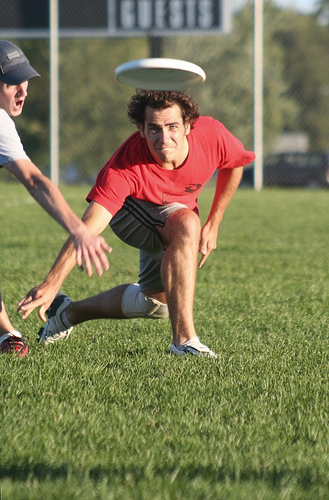

In [ ]:
from google.colab.patches import cv2_imshow 
import numpy as np
import cv2
image=cv2.imread('/content/drive/My Drive/Flicker8k_Dataset/229978782_3c690f5a0e.jpg') #insert parent1 picture here
#image2=cv2.imread('/content/drive.My Drive/') #insert parent2 picture here
cv2_imshow(image)
#cv2_imshow(image2)
image=cv2.resize(image,(160,160))
#image2=cv2.resize(image2,(160,160))
image=np.expand_dims(image,0)
#image2=np.expand_dims(image2,0)
y1=model.predict(image)
#y2=model.predict(image2)
#y1=np.append(y1,y2,axis=1) #y1.shape=(1,256)

In [ ]:
#Child features from FaceNet
child=cv2.imread('')
cv2_imshow(child)
child=cv2.resize(child,(160,160))
child=np.expand_dims(child,0)
y_child=model.predict(child) #y_child.shape=(1,128)

<pre>
DenseNet Architecture 
trainX= parents features conctd
trainY=corresponding child features

256 --> 128
</pre>

In [ ]:
#For now, this seems a good-enough model
#add BatchNorm and Dropout
#model.add(BatchNormalization(momentum=0.8))
'''
Training Data would be as follows:
Parents features (concatated) would be fit to child's features 

Shape of parent's features: (1,256)
Shape of child's features: (1,128)

Flatten() has been added to get features as (None,256)
Train for x epochs (until convergence)
Opt: Adam
Loss: MSE 
'''
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers.normalization import BatchNormalization

model=Sequential()
model.add(Flatten(input_shape=(1,256)))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))

model.summary()

<pre>
Convert facial embeddings directly to images using SytleGAN 
</pre>

In [ ]:
!pip install config

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 377.0MB 46kB/s 
     |████████████████████████████████| 3.2MB 36.4MB/s 
     |████████████████████████████████| 491kB 40.9MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


In [ ]:
#fix dnnlib issue
!git clone https://github.com/lucidrains/stylegan.git
%cd
%cd /content/stylegan

Cloning into 'stylegan'...
remote: Enumerating objects: 66, done.
remote: Total 66 (delta 0), reused 0 (delta 0), pack-reused 66
Unpacking objects: 100% (66/66), done.
/root
/content/stylegan


In [ ]:
import sys
sys.path.append('/content/stylegan/dnnlib')
import os
import pickle
import numpy as np
from PIL import Image
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
import dnnlib
import dnnlib.tflib as tflib
import config

import matplotlib.pyplot as plt
import cv2

from keras.models import load_model

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=160

In [ ]:
from sklearn.externals import joblib
# Initialize TensorFlow.
tflib.init_tf()

# Load pre-trained StyleGAN network.
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
# url = 'https://drive.google.com/uc?id=1MQywl0FNt6lHu8E_EUqnRbviagS7fbiJ' # stylegan-cats-256x256.pkl
with open('/content/drive/My Drive/karras2019stylegan-ffhq-1024x1024.pkl','rb') as f:     #styleGAN  -- add support and test with styleGAN 2
  _G,_D,Gs=pickle.load(f)
#with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as d:
 #   _g, _d, gs = pickle.load(d)
    # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
    # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
    # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

# Print network details.
Gs.print_layers()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2         

In [ ]:
import random as rnd
#generate provided number of latent vectors
def gen_latents(count):
  latents=np.random.randn(count,Gs.input_shape[1])
  return latents

#copies the latent vectors 'steps' times, and step-changes the 0th index value
def gen_latents_stepped(latents,steps,indexes):
  delta=2.0/steps
  latent_step=np.repeat(latents,steps,axis=0)
  for i in range(steps):
    for k in indexes:
      latents_step[i][k]=delta*i-1.0

  return latent_step

#generates images given latents
def gen_images(latents):
  #generate image
  fmt=dict(func=tflib.convert_images_to_uint8,nchw_to_nhwc=True)
  images=Gs.run(latents,None,truncation_psi=0.7,randomize_noise=False,output_transform=fmt)
  return images

#compiles a grid of 5x5 images into one larger images
def create_gallery(images):
  r,c=5,5
  nindex,height,width,intensity=images.shape
  nrows=nindex//c
  assert nindex==nrows*c
  gallery=(images.reshape(nrows,c,height,width,intensity)
  .swapaxes(1,2)
  .reshape(height*nrows,width*c,intensity))

  return gallery

#create series of 25 images by stepping modifications, given the range
def test_gallery_stepping_latent(step_range):
  latents=gen_latents(1)
  steps=gen_latents_stepped(latents,25,step_range)
  images=gen_images(steps)
  gallery=create_gallery(images)
  return gallery

In [ ]:
4#load FaceNet model
model_file='/content/drive/My Drive/facenet_keras.h5'
FRmodel=load_model(model_file)

#summarize input and output shape
print(FRmodel.inputs)
print(FRmodel.outputs)

[<tf.Tensor 'input_1_1:0' shape=(?, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm_1/cond/Merge:0' shape=(?, 128) dtype=float32>]


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
#Preprocessing of face
#would not need (mostly)

cascade_path = '/content/drive/My Drive/haarcascade_frontalface_default.xml'
image_size = 224

def prewhiten(x):
    
    axis = (1, 2, 3)
    size = x[0].size

    mean = np.mean(x, axis=axis, keepdims=True)
    std = np.std(x, axis=axis, keepdims=True)
    std_adj = np.maximum(std, 1.0/np.sqrt(size))
    y = (x - mean) / std_adj
    return y

def l2_normalize(x, axis=-1, epsilon=1e-10):
    output = x / np.sqrt(np.maximum(np.sum(np.square(x), axis=axis, keepdims=True), epsilon))
    return output

cascade = cv2.CascadeClassifier(cascade_path)

def align_image(img):
    margin = 10
    faces = cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=3)
    (x, y, w, h) = faces[0]
    cropped = img[y-margin//2:y+h+margin//2,
                  x-margin//2:x+w+margin//2, :]
    aligned = cv2.resize(cropped, (image_size, image_size))
    return aligned

#NOTE: THIS IS ONLY FOR TEST PURPOSES. USE CORRECT load_and_align FUNCTION FOR ACTUAL EXPERIMENT    

def load_and_align_images(filepaths, margin):
    cascade = cv2.CascadeClassifier(cascade_path)
    
    aligned_images = []
    for filepath in filepaths:
        img = cv2.imread(filepath)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        faces=cascade.detectMultiScale(gray,1.3,5)
        print(faces)
        (x, y, w, h) = faces[0]
        cropped = img[y-margin//2:y+h+margin//2,
                      x-margin//2:x+w+margin//2, :]
        aligned = cv2.resize(cropped, (image_size, image_size))#, mode='reflect')
        aligned_images.append(aligned)
            
    return np.array(aligned_images)
'''
def load_and_align_images(filepaths,margin):
  for filepath in filepaths:
    img=cv2.imread(filepath,cv2.IMREAD_UNCHANGED)
    dim=(160,160)
    resized=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
  return np.array(resized)
'''

'\ndef load_and_align_images(filepaths,margin):\n  for filepath in filepaths:\n    img=cv2.imread(filepath,cv2.IMREAD_UNCHANGED)\n    dim=(160,160)\n    resized=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)\n  return np.array(resized)\n'

In [ ]:
#to get embeddings from an image

#returns embeddings
def get_embedding_from_img(path):
  aligned_img=load_and_align_images([path],margin=10)
  colored_img=np.asarray([cv2.cvtColor(img,cv2.COLOR_BGR2RGB) for img in aligned_img])

  return FRmodel.predict(prewhiten(colored_img)),colored_img

def get_closest_embeddings_args(to_emb):
  emb_loss=np.linalg.norm(all_embeddings-to_emb,axis=1)
  sorted_args=np.argsort(emb_loss)
  return emb_loss,sorted_args

In [ ]:
#Given a set of latent vectors, returns the one with the closest FaceNet embedding to the guiding embedding (usually the embedding itself)
#basically returns the closest latent to the embedding in the parameter (taken from densenet) given a set of latent vectors...this is embeddings --> latents
#Returns: (best_latent,best_index,images, loss)
#   best_latent: np array of shape (1,512)
#   best_index: index of the best image
#   images: np array of all images
#   loss: np array of facenet (12) losses
def get_best_latent(latents,guide_emb):
  images=gen_images(latents)
  resized=np.asarray([cv2.resize(image, (224, 224), interpolation=cv2.INTER_CUBIC) for image in images])
  embeddings=FRmodel.predict(prewhiten(resized))
  loss=np.linalg.norm(embeddings-guide_emb,axis=1)
  best=np.argmin(loss)
  best_latent=latents[best:best+1]

  return best_latent,best,images,loss

#copy the latent vector many times and add small noise
#input dim: (1,512)
def clone_latent_with_noise(latent,std_dev,count):
  next_latent=np.repeat(best_latent,count,axis=0)
  noise=np.random.normal(0,std_dev,next_latent.shape)
  #print(next_latent.shape,noise.shape)
  next_latent=next_latent+noise

  return next_latent


In [ ]:
#each iteration looks for 25 images for memory reasons
def search_latent_space(seed_latent,guide_emb,std_dev=1,iterations_per_step=20):
  overall_best=None
  overall_best_img=None
  overall_best_loss=100000

  step_count=25

  all_found_latents=list()
  all_found_losses=list()

  for i in range(iterations_per_step):
    latents=clone_latent_with_noise(seed_latent,std_dev,step_count)
    best,best_index,images,losses=get_best_latent(latents,guide_emb)

    all_found_latents.append(overall_best)
    all_found_losses.append(losses[best_index])

    if losses[best_index]<overall_best_loss:
      overall_best=best
      overall_best_loss=losses[best_index]
      overall_best_img=images[best_index]

      print('found best so far with loss:',overall_best_loss)

  return overall_best, overall_best_img, overall_best_loss, all_found_latents, all_found_losses

In [ ]:
!pip install keras-vggface

In [ ]:
from keras.models import Model
from keras_vggface.vggface import VGGFace
model=VGGFace(model='vgg16')
out=model.get_layer('fc7').output
FRmodel=Model(model.input,out)


580075520/580070376 [==============================] - 18s 0us/step


In [ ]:
#DO NOT RUN

 #s2f_latents=np.zeros(6144).reshape(12,512)
 #s2f_embeddings=np.zeros(49152).reshape(12,4096) #basically trying to fit the speech2face model to StyleGAN
 #final_latents=np.zeros(6144).reshape(12,512)
 #final_embeddings=np.zeros(1536).reshape(12,128)
# generate 20k * 25 pairs of (latent, embedding)
for i in range(20000):
    latents = gen_latents(12)
    images = gen_images(latents)
    resized = np.asarray([cv2.resize(image, (224, 224), interpolation=cv2.INTER_CUBIC) for image in images]) #initially was (160,160) for facenet, resized to (224,224) for VGGFace
#     resized = np.asarray([align_image(image) for image in images])
    embeddings = FRmodel.predict(prewhiten(resized))
    s2f_latents = np.concatenate((s2f_latents, latents))
    s2f_embeddings = np.concatenate((s2f_embeddings, embeddings))
    print('finished iteration', i)
    np.savez_compressed('/content/drive/My Drive/s2f_latents_legit.npz',s2f_latents)
    np.savez_compressed('/content/drive/My Drive/s2f_embeddings_legit.npz',s2f_embeddings)

finished iteration 0
finished iteration 1
finished iteration 2
finished iteration 3
finished iteration 4
finished iteration 5
finished iteration 6
finished iteration 7
finished iteration 8
finished iteration 9
finished iteration 10
finished iteration 11
finished iteration 12
finished iteration 13
finished iteration 14
finished iteration 15
finished iteration 16
finished iteration 17
finished iteration 18
finished iteration 19
finished iteration 20
finished iteration 21
finished iteration 22
finished iteration 23
finished iteration 24
finished iteration 25
finished iteration 26
finished iteration 27
finished iteration 28
finished iteration 29
finished iteration 30
finished iteration 31
finished iteration 32
finished iteration 33
finished iteration 34
finished iteration 35
finished iteration 36
finished iteration 37
finished iteration 38
finished iteration 39
finished iteration 40
finished iteration 41
finished iteration 42
finished iteration 43
finished iteration 44
finished iteration 4

In [ ]:
#np.savez_compressed('/content/drive/My Drive/final_latent_legit.npz',final_latents)

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
# load guiding image
#img = load_img('/content/drive/My Drive/P00018_face2.jpg', target_size=(160,160,3))
#img = img_to_array(img)
#img=np.expand_dims(img,axis=0)
#img_emb=FRmodel.predict(prewhiten(img))
#img_emb = FRmodel.predict(prewhiten(img))
mpl.rcParams['figure.dpi']= 80
#print(img_emb)
#cv2_imshow(img)
#plt.imshow(img/255)

emb,img=get_embedding_from_img('/content/drive/My Drive/Flicker8k_Dataset/229978782_3c690f5a0e.jpg') #man with frisbee
emb_loss,sorted_args=get_closest_embeddings_args(emb)

[[138 108  51  51]]


In [ ]:
emb_loss,sorted_args=get_closest_embeddings_args(a)
#print(emb_loss,sorted_args)

In [ ]:
#The embedding at line 20 would come after training the improved densenet model
#cut the training after 10 iterations [[0,1,2,3],[0,1,2,3],[0,1]]
next_losses3=list()
next_imgs3=list()
next_vecs3=list()
next_all_latents3=list()
next_all_losses3=list()
for k in range(5):
    
    found_losses=list()
    found_imgs=list()
    found_vecs=list()
    found_all_latents=list()
    found_all_losses=list()
    
    std_devs=[0.5, 0.45, 0.3, 0.3]
    iterations=[100, 100, 100, 100]
        
    best_latent=all_latents[sorted_args[0]:sorted_args[0]+1]
    #guide_emb=a #final result
    guide_emb=emb
    
    for i in range(len(std_devs)):
        best_latent, best_img, best_loss, all_found_latents, all_found_losses = search_latent_space(best_latent, guide_emb, std_dev=std_devs[i], iterations_per_step=iterations[i])
        found_losses.append(best_loss)
        found_imgs.append(best_img)
        found_vecs.append(best_latent)
        
        found_all_latents.append(all_found_latents)
        found_all_losses.append(all_found_losses)

        print('[iteration', i, ']: embeddings loss: ', best_loss)
        
    next_losses3.append(found_losses)
    next_imgs3.append(found_imgs)
    next_vecs3.append(found_vecs)
    next_all_latents3.append(found_all_latents)
    next_all_losses3.append(found_all_losses)

found best so far with loss: 9.416117
found best so far with loss: 7.797501
found best so far with loss: 7.5138955
found best so far with loss: 7.4003425
[iteration 0 ]: embeddings loss:  7.4003425
found best so far with loss: 7.921648
found best so far with loss: 7.7226067
found best so far with loss: 7.483534
found best so far with loss: 7.46066
found best so far with loss: 7.243671
found best so far with loss: 7.1525116
found best so far with loss: 7.1476016
found best so far with loss: 6.778234
[iteration 1 ]: embeddings loss:  6.778234
found best so far with loss: 7.17916
found best so far with loss: 6.833929
found best so far with loss: 6.7522745
found best so far with loss: 6.6890435
found best so far with loss: 6.62482
[iteration 2 ]: embeddings loss:  6.62482
found best so far with loss: 6.8099675
found best so far with loss: 6.708353
found best so far with loss: 6.705045
found best so far with loss: 6.6026096
found best so far with loss: 6.5879254
found best so far with loss:

KeyboardInterrupt: ignored

In [ ]:
print(next_vecs3[0][3].shape)

(1, 512)


[[7.4003425, 6.778234, 6.62482, 6.4165564], [7.4555283, 6.69598, 6.4764714, 6.672124], [7.3656077, 6.9044547, 6.417357, 6.2483435]]


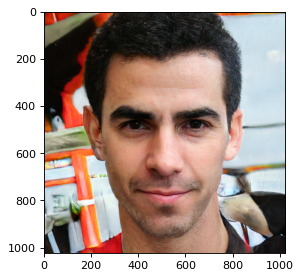

In [ ]:
#this will show the best generated image based on the embeddings provided (from the densenet model) in the cell above
# Show losses for each iteration
next_losses3
print(next_losses3)
# Show best generated image
mpl.rcParams['figure.dpi']= 80
plt.imshow(next_imgs3[2][3])

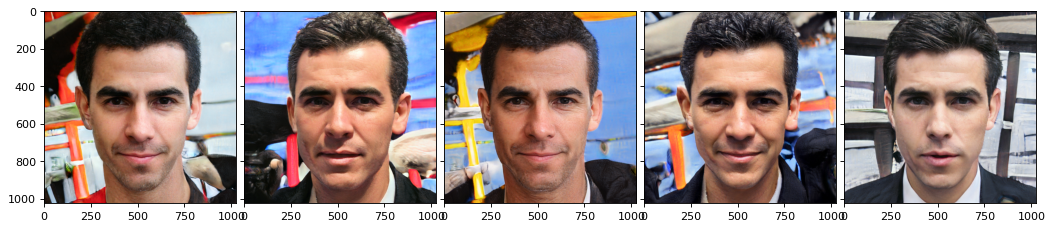

In [ ]:
#top 5 results for each image -- note image is not there, just the top 5 results
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1=next_imgs3[2][3]
im2=next_imgs3[0][3]
im3=next_imgs3[2][2]
im4=next_imgs3[0][2]
im5=next_imgs3[1][2]

fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4, im5]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [ ]:
print(next_vecs3[2][3].shape)
transposed_next_vecs3=np.reshape(next_vecs3[2][3],(512,))
print(transposed_next_vecs3.shape)

(1, 512)
(512,)


In [ ]:
np.save('/content/image_trans.npy',transposed_next_vecs3)

In [ ]:
!nvidia-smi

Fri Apr 24 19:34:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    24W /  75W |   7499MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
#maybe install tensorflow-gpu 1.14.0  -- this worked..no need to change cuda version
#change version of CUDA from v10.1 to v10.0

TEST

In [ ]:
np.savez_compressed('all_embeddings_legit.npz',all_embeddings)

In [ ]:
all_latents=np.load('/content/drive/My Drive/all_latents_legit.npz')
all_latents=all_latents.f.arr_0
all_embeddings=np.load('/content/drive/My Drive/all_embeddings_legit.npz')
all_embeddings=all_embeddings.f.arr_0

In [ ]:
s2f_latents=np.load('/content/drive/My Drive/s2f_latents_legit.npz')
s2f_latents=s2f_latents.f.arr_0
s2f_embeddings=np.load('/content/drive/My Drive/s2f_embeddings_legit.npz')
s2f_embeddings=s2f_embeddings.f.arr_0

In [ ]:
s2f_latents.shape

(12192, 512)

In [ ]:
s2f_embeddings.shape

(12180, 4096)

In [ ]:
all_latents.shape

(7968, 512)

In [ ]:
all_embeddings.shape

(7968, 4096)

In [ ]:
np.savez_compressed('/content/drive/My Drive/x_latents_legit.npz',x_latents)
np.savez_compressed('/content/drive/My Drive/x_embeddings_legit.npz',x_embeddings)

In [ ]:
print(x_latents.shape,x_embeddings.shape)

(98160, 512) (98160, 128)


In [ ]:
#run this before testing on images
all_latents=s2f_latents
all_embeddings=s2f_embeddings

In [ ]:
#run this before testing on images
all_latents=x_latents
all_embeddings=x_embeddings

In [ ]:
import tensorflow as tf

In [ ]:
print(1,2,3,4,5)

1 2 3 4 5


**TL-GAN**

In [ ]:
!git clone https://github.com/SummitKwan/transparent_latent_gan.git
%cd
%cd /content/transparent_latent_gan/

Cloning into 'transparent_latent_gan'...
remote: Enumerating objects: 300, done.
remote: Total 300 (delta 0), reused 0 (delta 0), pack-reused 300
Receiving objects: 100% (300/300), 3.77 MiB | 2.65 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/root
/content/transparent_latent_gan


In [ ]:
import glob
import sys
import numpy as np
import pickle
import tensorflow as tf
import PIL
import ipywidgets
import io
import os

""" make sure this notebook is running from root directory """
while os.path.basename(os.getcwd()) in ('notebooks', 'src'):
    os.chdir('..')
assert ('README.md' in os.listdir('./')), 'Can not find project root, please cd to project root before running the following code'

import src.tl_gan.generate_image as generate_image
import src.tl_gan.feature_axis as feature_axis
import src.tl_gan.feature_celeba_organize as feature_celeba_organize

In [ ]:
""" load feature directions """
path_feature_direction = '/content/drive/My Drive/TL-GAN Model/'

pathfile_feature_direction = glob.glob(os.path.join(path_feature_direction, 'feature_direction_20181002_044444.pkl'))[-1]

with open(pathfile_feature_direction, 'rb') as f:
    feature_direction_name = pickle.load(f)

feature_direction = feature_direction_name['direction']
feature_name = feature_direction_name['name']
num_feature = feature_direction.shape[1]

import importlib
importlib.reload(feature_celeba_organize)
feature_name = feature_celeba_organize.feature_name_celeba_rename
feature_direction = feature_direction_name['direction']* feature_celeba_organize.feature_reverse[None, :]

In [ ]:
""" start tf session and load GAN model """

# path to model code and weight
path_pg_gan_code = '/content/drive/My Drive/TL-GAN Model/'
path_model = '/content/drive/My Drive/karras2019stylegan-ffhq-1024x1024.pkl'
#path_model = '/content/drive/My Drive/TL-GAN Model/karras2018iclr-celebahq-1024x1024.pkl'
sys.path.append(path_pg_gan_code)


""" create tf session """
yn_CPU_only = False

if yn_CPU_only:
    config = tf.ConfigProto(device_count = {'GPU': 0}, allow_soft_placement=True)
else:
    config = tf.ConfigProto(allow_soft_placement=True)
    config.gpu_options.allow_growth = True

sess = tf.InteractiveSession(config=config)
sess.run(tf.global_variables_initializer())

try:
    with open(path_model, 'rb') as file:
        Gt, Dt, Gst = pickle.load(file)
except FileNotFoundError:
    print('before running the code, download pre-trained model to project_root/asset_model/')
    raise

len_z = Gst.input_shapes[0][1]
z_sample = np.random.randn(len_z)
x_sample = generate_image.gen_single_img(z_sample, Gs=Gst)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
def img_to_bytes(x_sample):
    imgObj = PIL.Image.fromarray(x_sample)
    imgByteArr = io.BytesIO()
    imgObj.save(imgByteArr, format='PNG')
    imgBytes = imgByteArr.getvalue()
    return imgBytes

In [ ]:
print(x_sample.shape)
print(next_imgs3[0][3].shape)
print('z_sample')
print(z_sample.shape)


(1024, 1024, 3)
(1024, 1024, 3)
z_sample
(512, 1)
(1, 512)
(512,)


In [ ]:
z_sample=transposed_next_vecs3
#z_sample = np.random.randn(len_z)
x_sample = generate_image.gen_single_img(Gs=Gst)

w_img = ipywidgets.widgets.Image(value=img_to_bytes(x_sample), fromat='png', width=512, height=512)

class GuiCallback(object):
    counter = 0
    #     latents = z_sample
    def __init__(self):
        self.latents = z_sample
        self.feature_direction = feature_direction
        self.feature_lock_status = np.zeros(num_feature).astype('bool')
        self.feature_directoion_disentangled = feature_axis.disentangle_feature_axis_by_idx(
            self.feature_direction, idx_base=np.flatnonzero(self.feature_lock_status))

    def random_gen(self, event):
        self.latents = np.random.randn(len_z)
        self.update_img()

    def modify_along_feature(self, event, idx_feature, step_size=15.0): #initial step_size=0.01
        self.latents += self.feature_directoion_disentangled[:, idx_feature] * step_size
        self.update_img()

    def set_feature_lock(self, event, idx_feature, set_to=None):
        if set_to is None:
            self.feature_lock_status[idx_feature] = np.logical_not(self.feature_lock_status[idx_feature])
        else:
            self.feature_lock_status[idx_feature] = set_to
        self.feature_directoion_disentangled = feature_axis.disentangle_feature_axis_by_idx(
            self.feature_direction, idx_base=np.flatnonzero(self.feature_lock_status))
    
    def update_img(self):        
        x_sample = generate_image.gen_single_img(z=self.latents, Gs=Gst)
        x_byte = img_to_bytes(x_sample)
        w_img.value = x_byte

guicallback = GuiCallback()

step_size = 0.4
def create_button(idx_feature, width=96, height=40):
    """ function to built button groups for one feature """
    w_name_toggle = ipywidgets.widgets.ToggleButton(
        value=False, description=feature_name[idx_feature],
        tooltip='{}, Press down to lock this feature'.format(feature_name[idx_feature]),
        layout=ipywidgets.Layout(height='{:.0f}px'.format(height/2), 
                                 width='{:.0f}px'.format(width),
                                 margin='2px 2px 2px 2px')
    )
    w_neg = ipywidgets.widgets.Button(description='-',
                                      layout=ipywidgets.Layout(height='{:.0f}px'.format(height/2), 
                                                               width='{:.0f}px'.format(width/2),
                                                               margin='1px 1px 5px 1px'))
    w_pos = ipywidgets.widgets.Button(description='+',
                                      layout=ipywidgets.Layout(height='{:.0f}px'.format(height/2), 
                                                               width='{:.0f}px'.format(width/2),
                                                               margin='1px 1px 5px 1px'))
    
    w_name_toggle.observe(lambda event: 
                      guicallback.set_feature_lock(event, idx_feature))
    w_neg.on_click(lambda event: 
                     guicallback.modify_along_feature(event, idx_feature, step_size=-1 * step_size))
    w_pos.on_click(lambda event: 
                     guicallback.modify_along_feature(event, idx_feature, step_size=+1 * step_size))
    
    button_group = ipywidgets.VBox([w_name_toggle, ipywidgets.HBox([w_neg, w_pos])],
                                  layout=ipywidgets.Layout(border='1px solid gray'))
    
    return button_group
  

list_buttons = []
for idx_feature in range(num_feature):
    list_buttons.append(create_button(idx_feature))

yn_button_select = True
def arrange_buttons(list_buttons, yn_button_select=True, ncol=4):
    num = len(list_buttons)
    if yn_button_select:
        feature_celeba_layout = feature_celeba_organize.feature_celeba_layout
        layout_all_buttons = ipywidgets.VBox([ipywidgets.HBox([list_buttons[item] for item in row]) for row in feature_celeba_layout])
    else:
        layout_all_buttons = ipywidgets.VBox([ipywidgets.HBox(list_buttons[i*ncol:(i+1)*ncol]) for i in range(num//ncol+int(num%ncol>0))])
    return layout_all_buttons
    

# w_button.on_click(on_button_clicked)
guicallback.update_img()
w_button_random = ipywidgets.widgets.Button(description='random face', button_style='success',
                                           layout=ipywidgets.Layout(height='40px', 
                                                               width='128px',
                                                               margin='1px 1px 5px 1px'))
w_button_random.on_click(guicallback.random_gen)

w_box = ipywidgets.HBox([w_img, 
                         ipywidgets.VBox([w_button_random, 
                                         arrange_buttons(list_buttons, yn_button_select=True)])
                        ], layout=ipywidgets.Layout(height='1024}px', width='1024px')
                       )

print('press +/- to adjust feature, toggle feature name to lock the feature')
display(w_box)

press +/- to adjust feature, toggle feature name to lock the feature


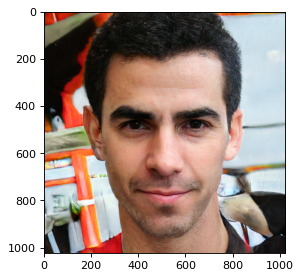

In [ ]:
plt.imshow(next_imgs3[2][3])

<h1>Interface-GAN</h1>

In [ ]:
!git clone https://github.com/genforce/interfacegan.git

fatal: destination path 'interfacegan' already exists and is not an empty directory.


In [ ]:
%cd

/root


In [ ]:
!cp /content/drive/My\ Drive/karras2019stylegan-ffhq-1024x1024.pkl /content/interfacegan/models/pretrain/

In [ ]:
%cd /content/interfacegan/

/content/interfacegan


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
LATENT_CODE_NUM=10
!python edit.py \
    -m stylegan_ffhq \
    -b boundaries/stylegan_ffhq_age_boundary.npy \
    -n "$LATENT_CODE_NUM" \
    -o Results/stylegan_celebahq_age_editing1

[2020-06-29 21:45:37,164][INFO] Initializing generator.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/frame

In [ ]:
print(0)

0


In [ ]:
!nvidia-smi

Mon Jun 29 21:35:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    73W / 149W |  10528MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------